In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
titanic = pd.read_csv('train.csv')

In [5]:
flights = sns.load_dataset('flights')

In [6]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
iris = sns.load_dataset('iris')

In [8]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 1. Scatterplot (Numerical - Numerical)
### gives relationship between two numerical datatype variables

<Axes: xlabel='total_bill', ylabel='tip'>

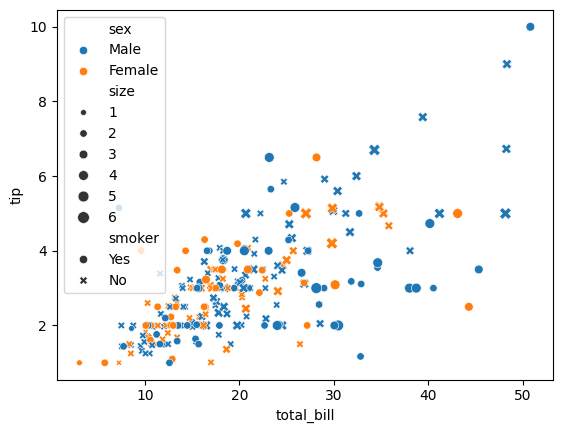

In [9]:
# sns.scatterplot(data=tips, x='total_bill', y='tip')
#since we are analysing only two variables its a bivariate analysis

sns.scatterplot(data =tips, x='total_bill', y='tip',hue='sex', style='smoker', size='size')
#since we are analysing more than two columns its a multivariate analysis
#x and y are numerical data

## 2. Bar Plot (Numerical - Categorical)

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

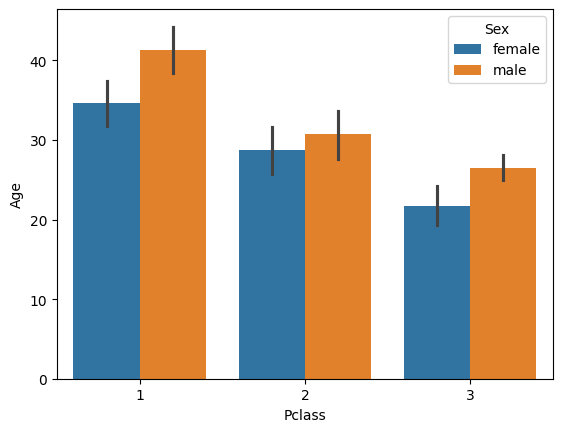

In [11]:
# sns.barplot(titanic['Pclass'],titanic['Age'],hue=titanic['Sex'])
sns.barplot(data = titanic, x='Pclass', y='Age',hue='Sex')
#black line in the middle of the bar shows the confidence interval

## 3. Box Plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

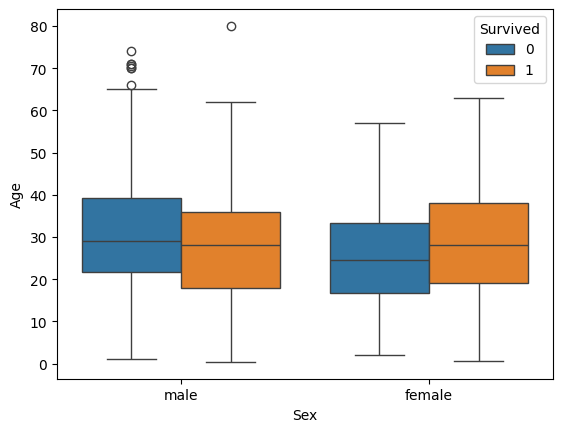

In [12]:
# sns.boxplot(titanic['Sex'],titanic['Age'],hue=titanic['Survived'])
sns.boxplot(data=titanic, x='Sex', y='Age', hue='Survived')

## 4. Distplot (Numerical - Categorical)

In [24]:
not_survived = titanic[titanic['Survived']==0]['Age']
survived = titanic[titanic['Survived']==1]['Age']

<Axes: xlabel='Age', ylabel='Density'>

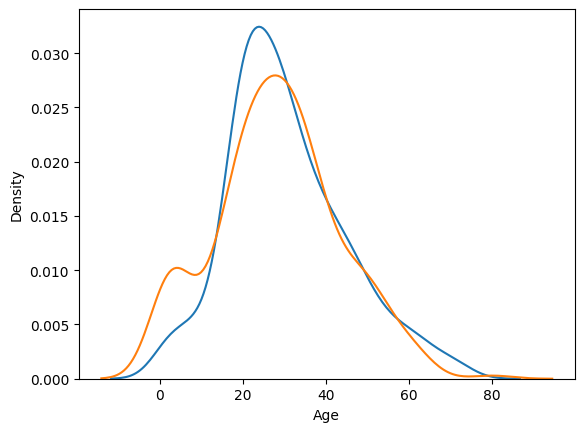

In [26]:
# sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)
# sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False)
sns.kdeplot(data=titanic, x=not_survived)
sns.kdeplot(data=titanic, x=survived)

## 5. HeatMap (Categorical - Categorical)

In [27]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='Survived', ylabel='Pclass'>

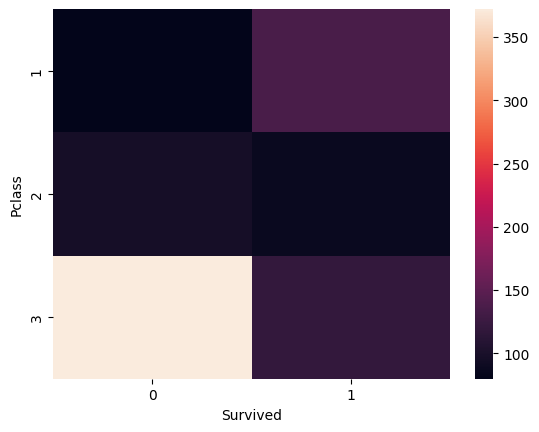

In [37]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))
# we can only see how many people survived or not survived but we cant see percentage here

In [47]:
titanic.groupby('Sex').mean('Survived')['Survived']*100
# with this we can calculate percentage of people survived 

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [72]:
(titanic.groupby('Embarked').mean('Survived')['Survived']*100)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

## 6. ClusterMap (Categorical - Categorical)

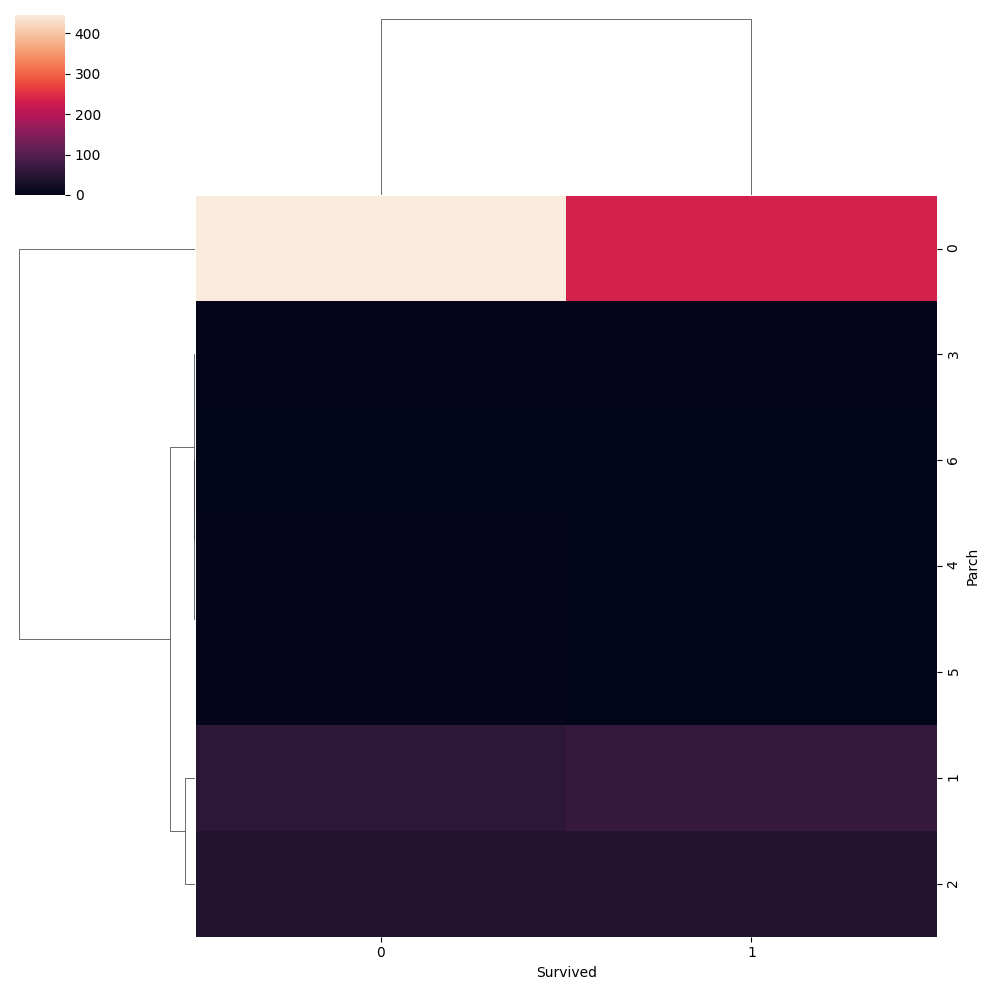

In [48]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

## 7. Pairplot

- pairplot is a collection of scatter plots
- It plots scatter plot for every numerical column with another numerical column

In [49]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


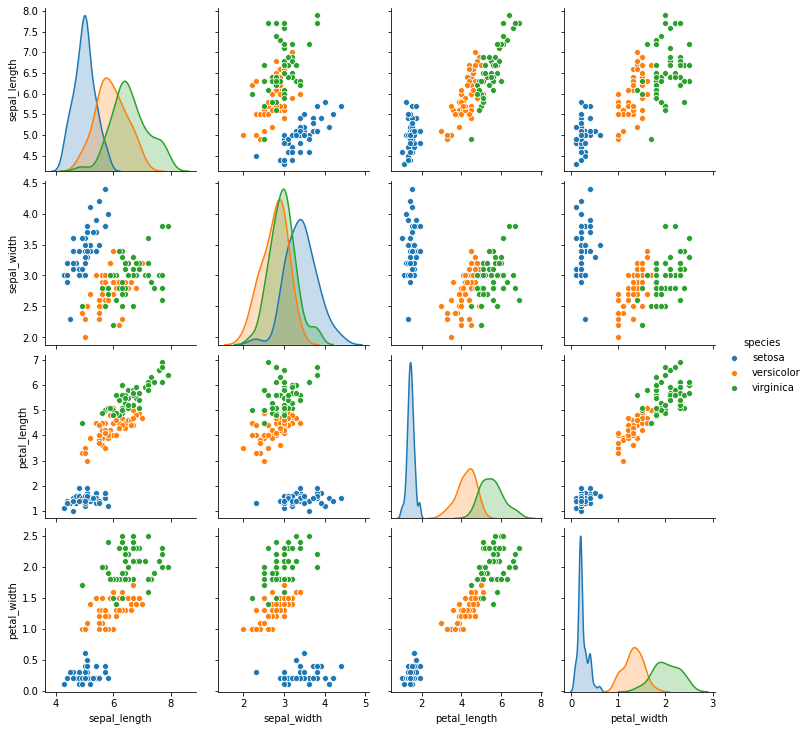

In [78]:
sns.pairplot(data=iris, hue='species')

## 8. Lineplot (Numerical - Numerical)
- If we join all the points of a scatter plot then thats a lineplot
- When we want to use time based quantity like date, time, year etc on x-axis then we use lineplot 

In [52]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [55]:
new = flights.groupby('year').sum('passangers').reset_index()
new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

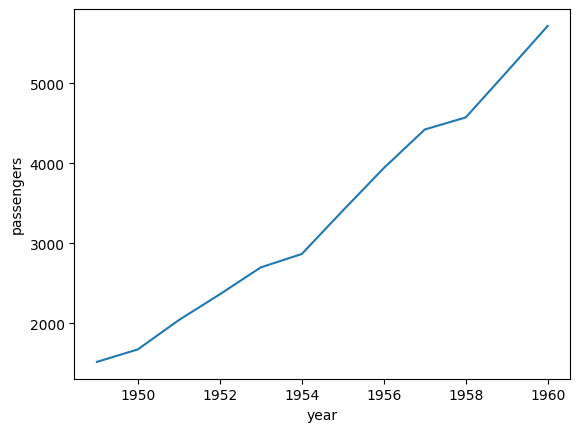

In [57]:
sns.lineplot(x = new['year'], y= new['passengers'])

In [85]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


C:\Users\aniru\AppData\Local\Temp\ipykernel_17660\2230379170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))


<Axes: xlabel='year', ylabel='month'>

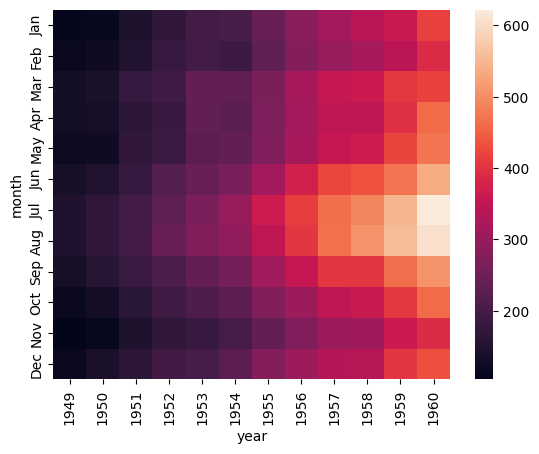

In [58]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

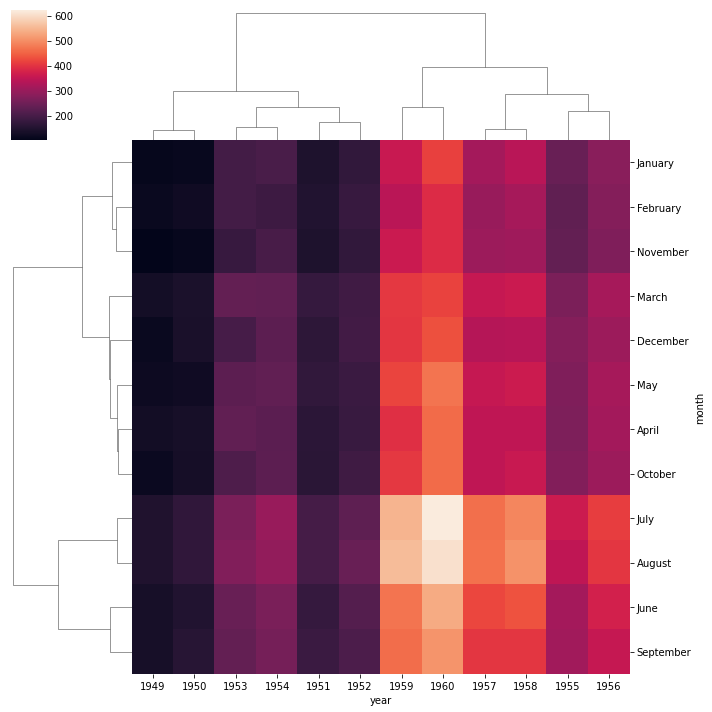

In [88]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))
#custer map shows if there is any similar behaviour between classes